In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('synthetic_asthma_dataset.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [7]:
df.shape

(10000, 17)

In [8]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [9]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

In [10]:

df.describe(include="all")

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
count,10000,10000.000000,10000,10000.000000,10000,10000.000000,7064,10000,10000,10000,5033,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,2433
unique,10000,NaN,3,NaN,3,NaN,4,3,3,2,3,NaN,NaN,NaN,NaN,NaN,3
top,ASTH109983,NaN,Female,NaN,Never,NaN,Dust,Moderate,Sedentary,Indoor,Diabetes,NaN,NaN,NaN,NaN,NaN,Not Controlled
freq,1,NaN,4814,NaN,6070,NaN,2479,4915,4062,7035,2029,NaN,NaN,NaN,NaN,NaN,1229
mean,NaN,44.930700,NaN,25.053320,NaN,0.303400,NaN,NaN,NaN,NaN,NaN,0.497998,1.015900,400.884090,25.101420,0.243300,NaN
std,NaN,25.653559,NaN,4.874466,NaN,0.459749,NaN,NaN,NaN,NaN,NaN,0.224809,1.020564,97.531113,9.840184,0.429096,NaN
min,NaN,1.000000,NaN,15.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,150.000000,5.000000,0.000000,NaN
25%,NaN,23.000000,NaN,21.600000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.320000,0.000000,334.800000,18.200000,0.000000,NaN
50%,NaN,45.000000,NaN,25.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.500000,1.000000,402.500000,25.000000,0.000000,NaN
75%,NaN,67.000000,NaN,28.400000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.670000,2.000000,468.700000,31.700000,0.000000,NaN


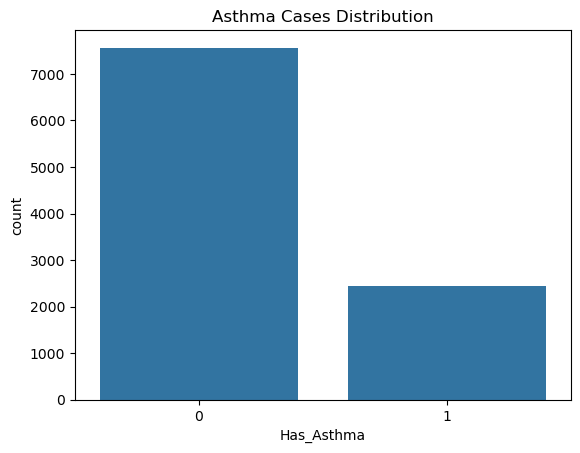

In [11]:
# Target = Has_Asthma
sns.countplot(x="Has_Asthma", data=df)
plt.title("Asthma Cases Distribution")
plt.show()



In [12]:
df = df.drop(columns=['Patient_ID','Asthma_Control_Level'])


In [13]:

df['Allergies'] = df['Allergies'].fillna('Unknown')
df['Comorbidities'] = df['Comorbidities'].fillna('Unknown')

In [14]:
def check_obj_col(df):
    for col in df.select_dtypes('object').columns:
        print(df[col].value_counts())
        print('\n') 

check_obj_col(df)

Gender
Female    4814
Male      4786
Other      400
Name: count, dtype: int64


Smoking_Status
Never      6070
Former     2487
Current    1443
Name: count, dtype: int64


Allergies
Unknown     2936
Dust        2479
Pollen      1999
Pets        1585
Multiple    1001
Name: count, dtype: int64


Air_Pollution_Level
Moderate    4915
Low         2984
High        2101
Name: count, dtype: int64


Physical_Activity_Level
Sedentary    4062
Moderate     3909
Active       2029
Name: count, dtype: int64


Occupation_Type
Indoor     7035
Outdoor    2965
Name: count, dtype: int64


Comorbidities
Unknown         4967
Diabetes        2029
Hypertension    2018
Both             986
Name: count, dtype: int64




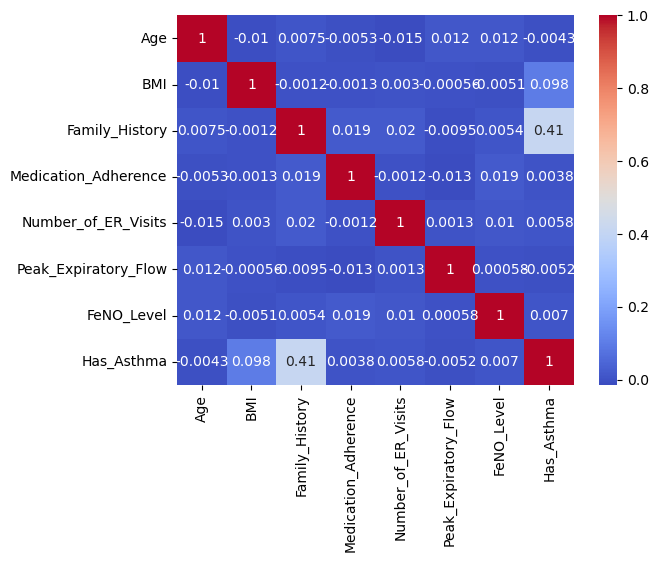

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'BMI', 'Family_History', 'Medication_Adherence', 
            'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level']

corr = df[num_cols + ['Has_Asthma']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


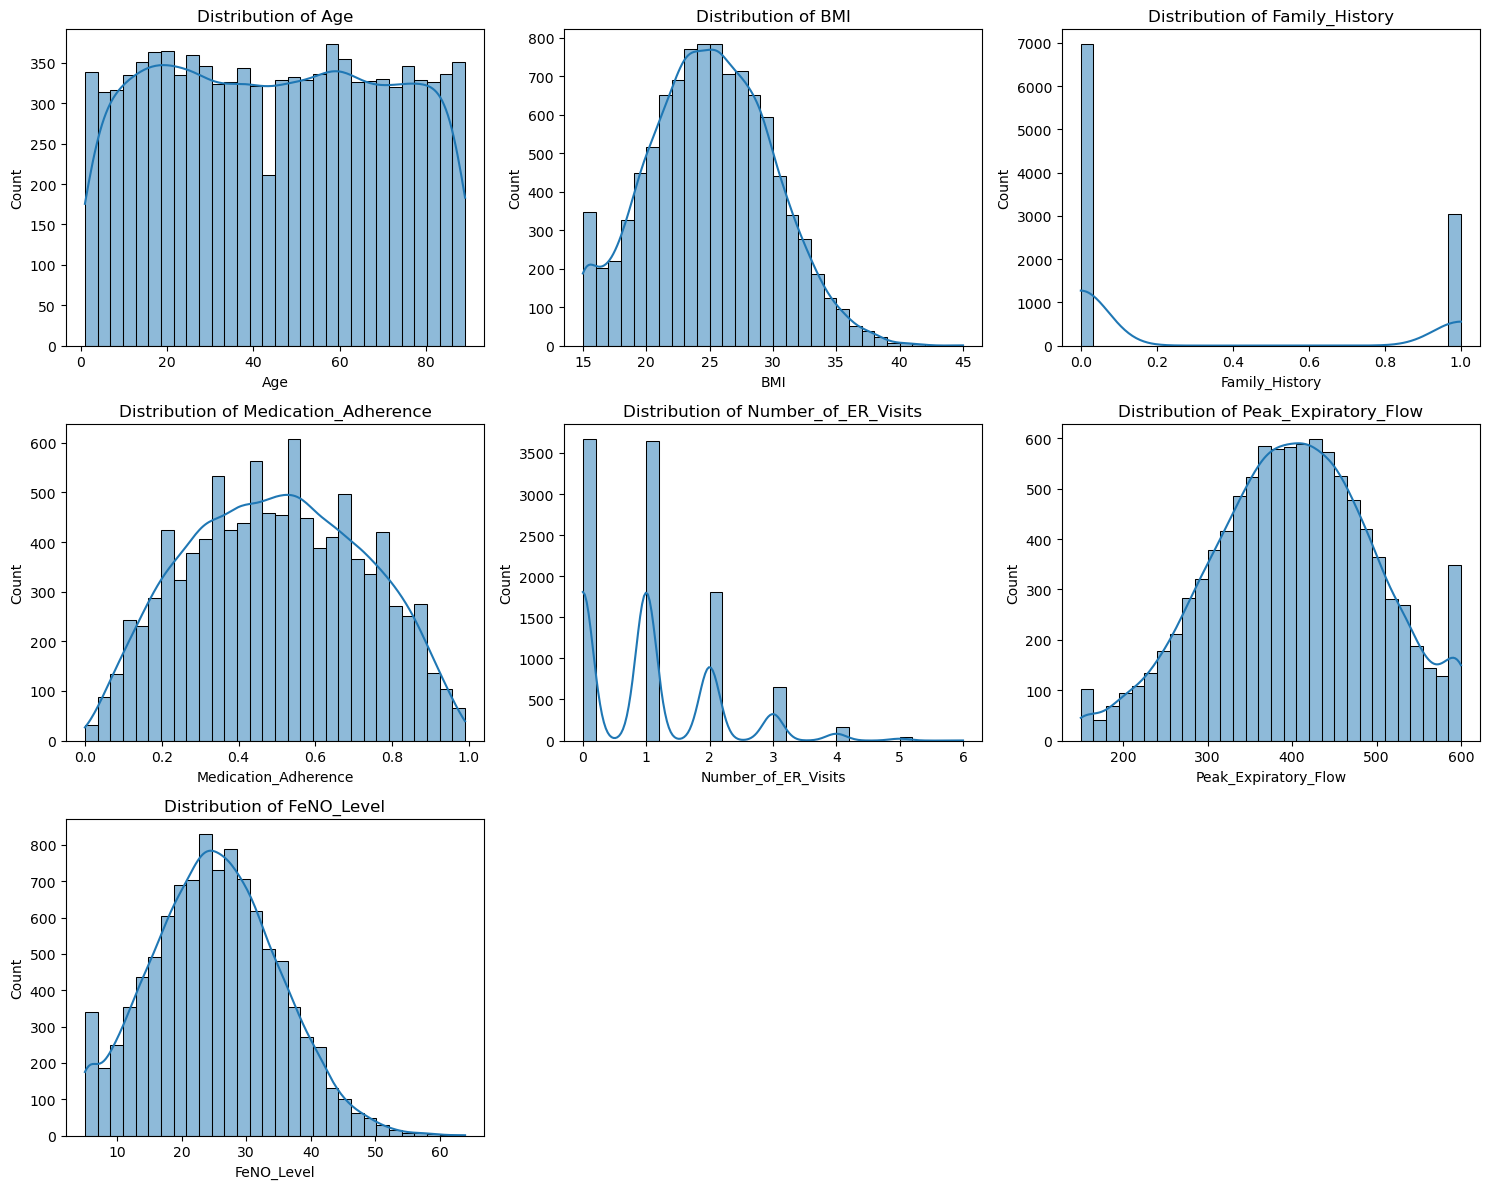

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'BMI', 'Family_History', 
                  'Medication_Adherence', 'Number_of_ER_Visits', 
                  'Peak_Expiratory_Flow', 'FeNO_Level']

# Decide grid size
n_cols = 3  # number of columns in grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


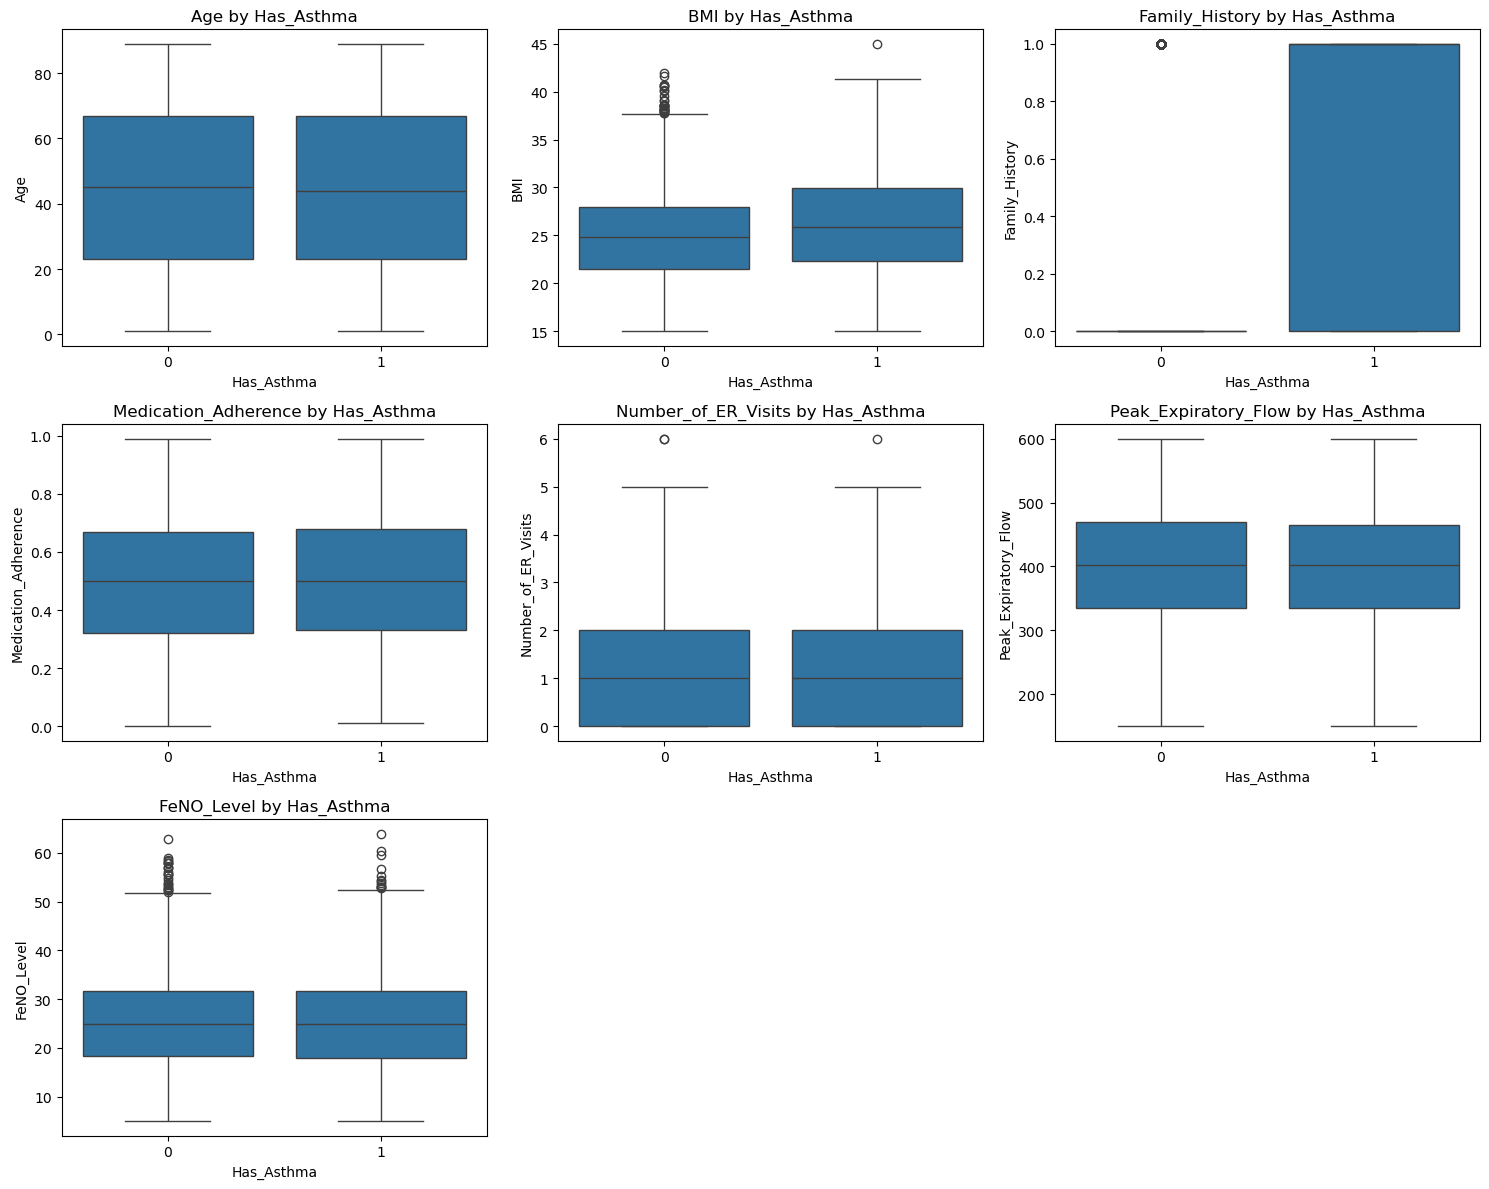

In [17]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Has_Asthma', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Has_Asthma')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


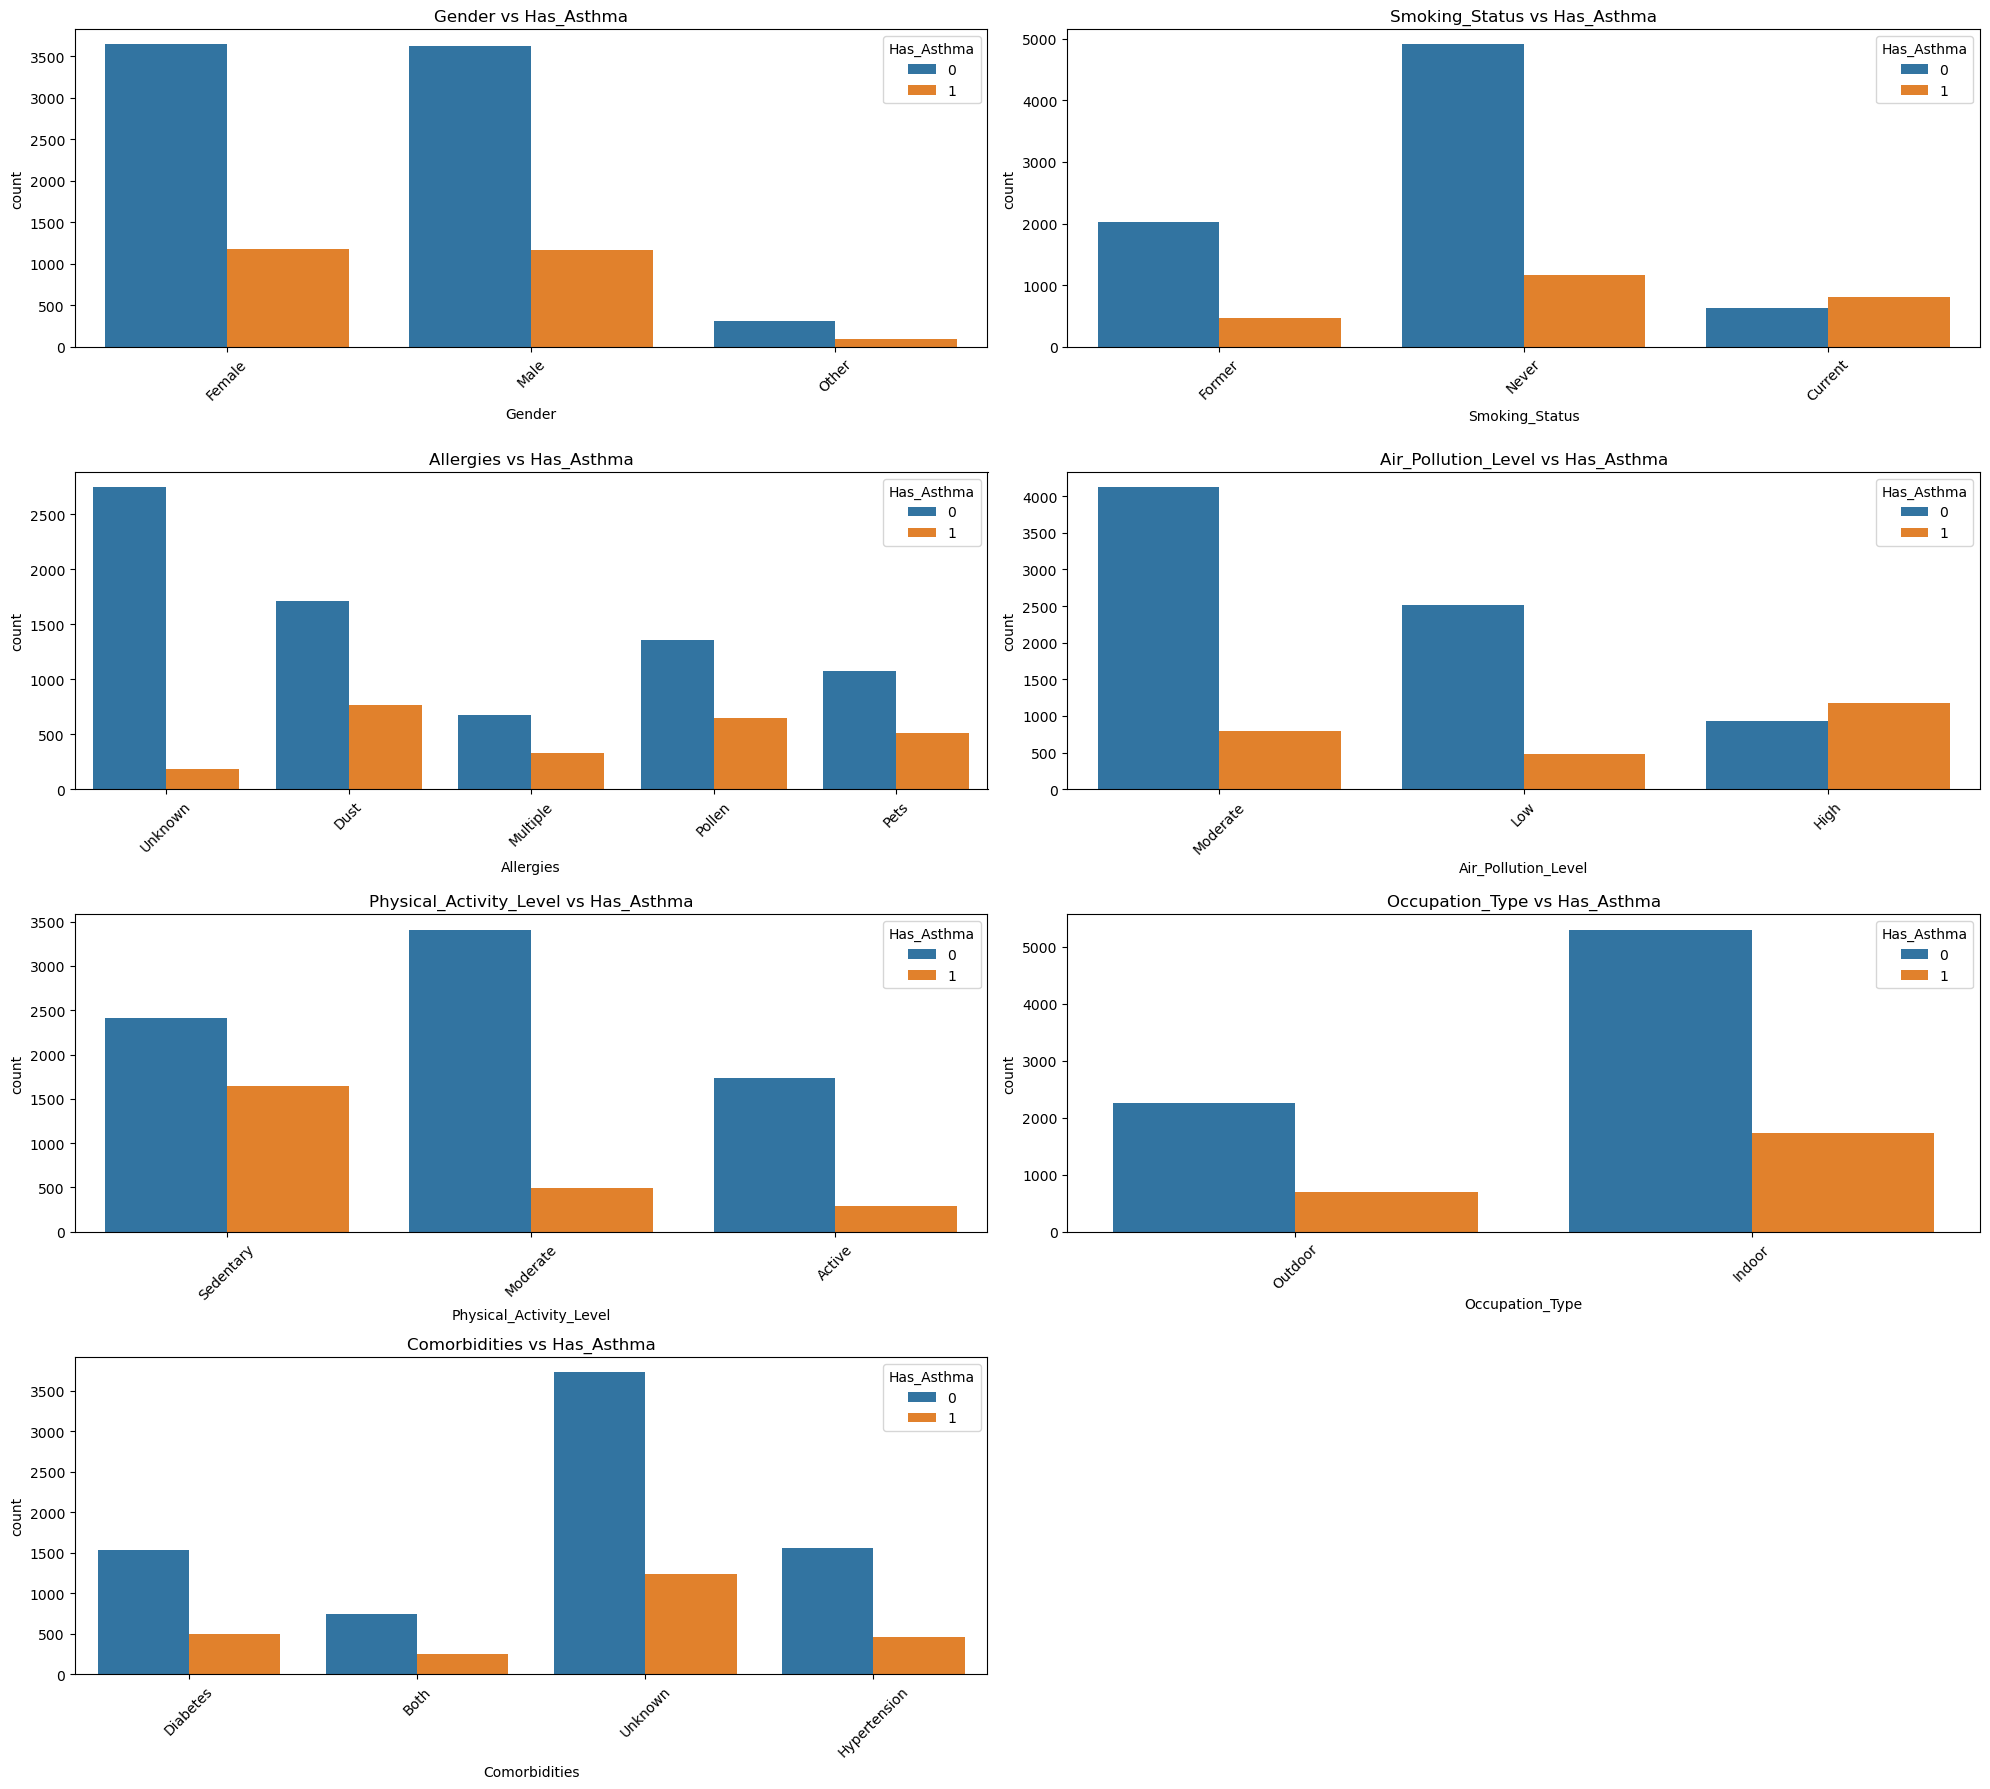

In [18]:
categorical_columns = ["Gender", "Smoking_Status", "Allergies", 
                       "Air_Pollution_Level", "Physical_Activity_Level", 
                       "Occupation_Type", "Comorbidities"]

plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, hue="Has_Asthma", data=df)
    plt.title(f"{col} vs Has_Asthma")
    plt.xticks(rotation=45)  # rotate labels if they overlap

plt.tight_layout()
plt.show()

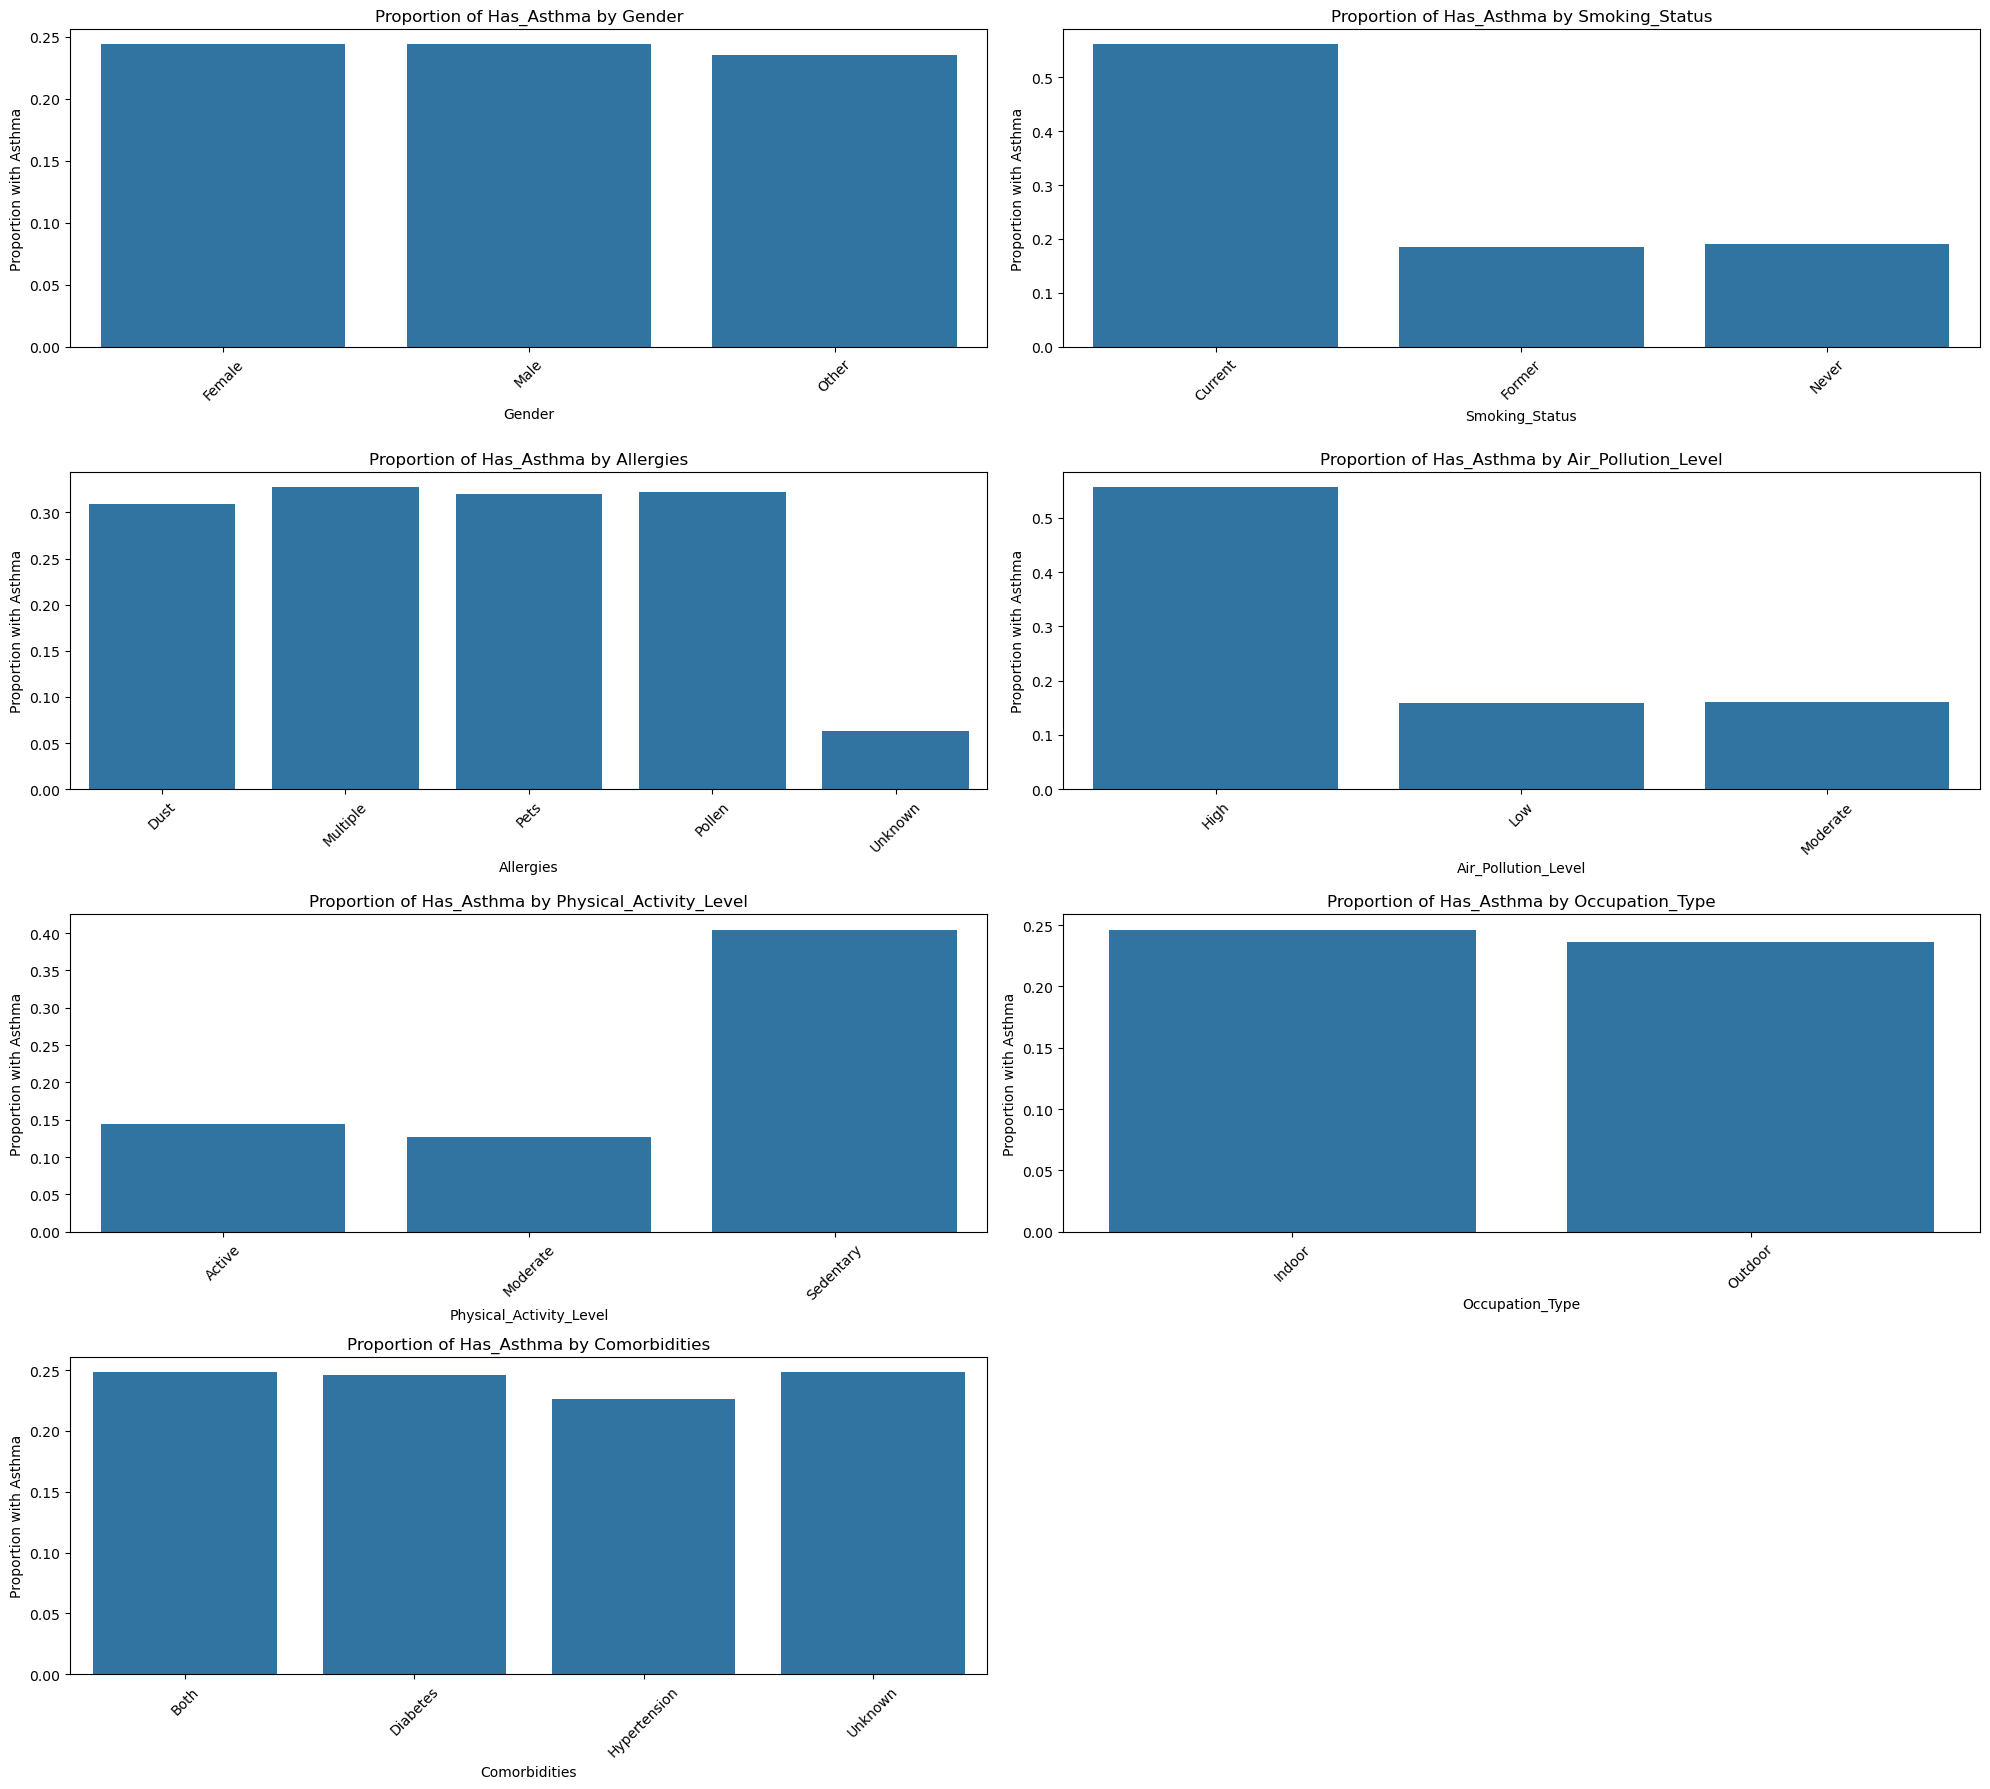

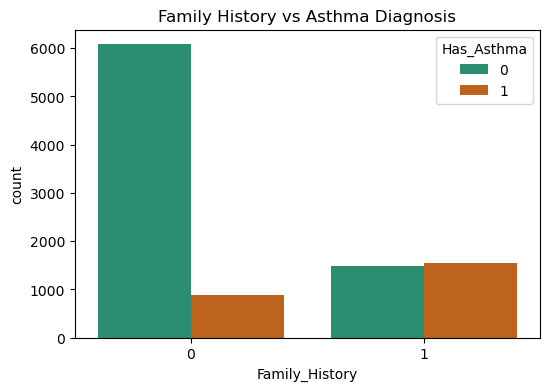

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ["Gender", "Smoking_Status", "Allergies", 
                       "Air_Pollution_Level", "Physical_Activity_Level", 
                       "Occupation_Type", "Comorbidities"]

plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    
    # Compute normalized counts
    prop_df = (df.groupby(col)['Has_Asthma']
                 .mean()
                 .reset_index())  # mean gives proportion of asthma=1
    
    sns.barplot(x=col, y='Has_Asthma', data=prop_df)
    plt.ylabel('Proportion with Asthma')
    plt.title(f"Proportion of Has_Asthma by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x="Family_History", hue="Has_Asthma", data=df, palette="Dark2")
plt.title("Family History vs Asthma Diagnosis")
plt.show()

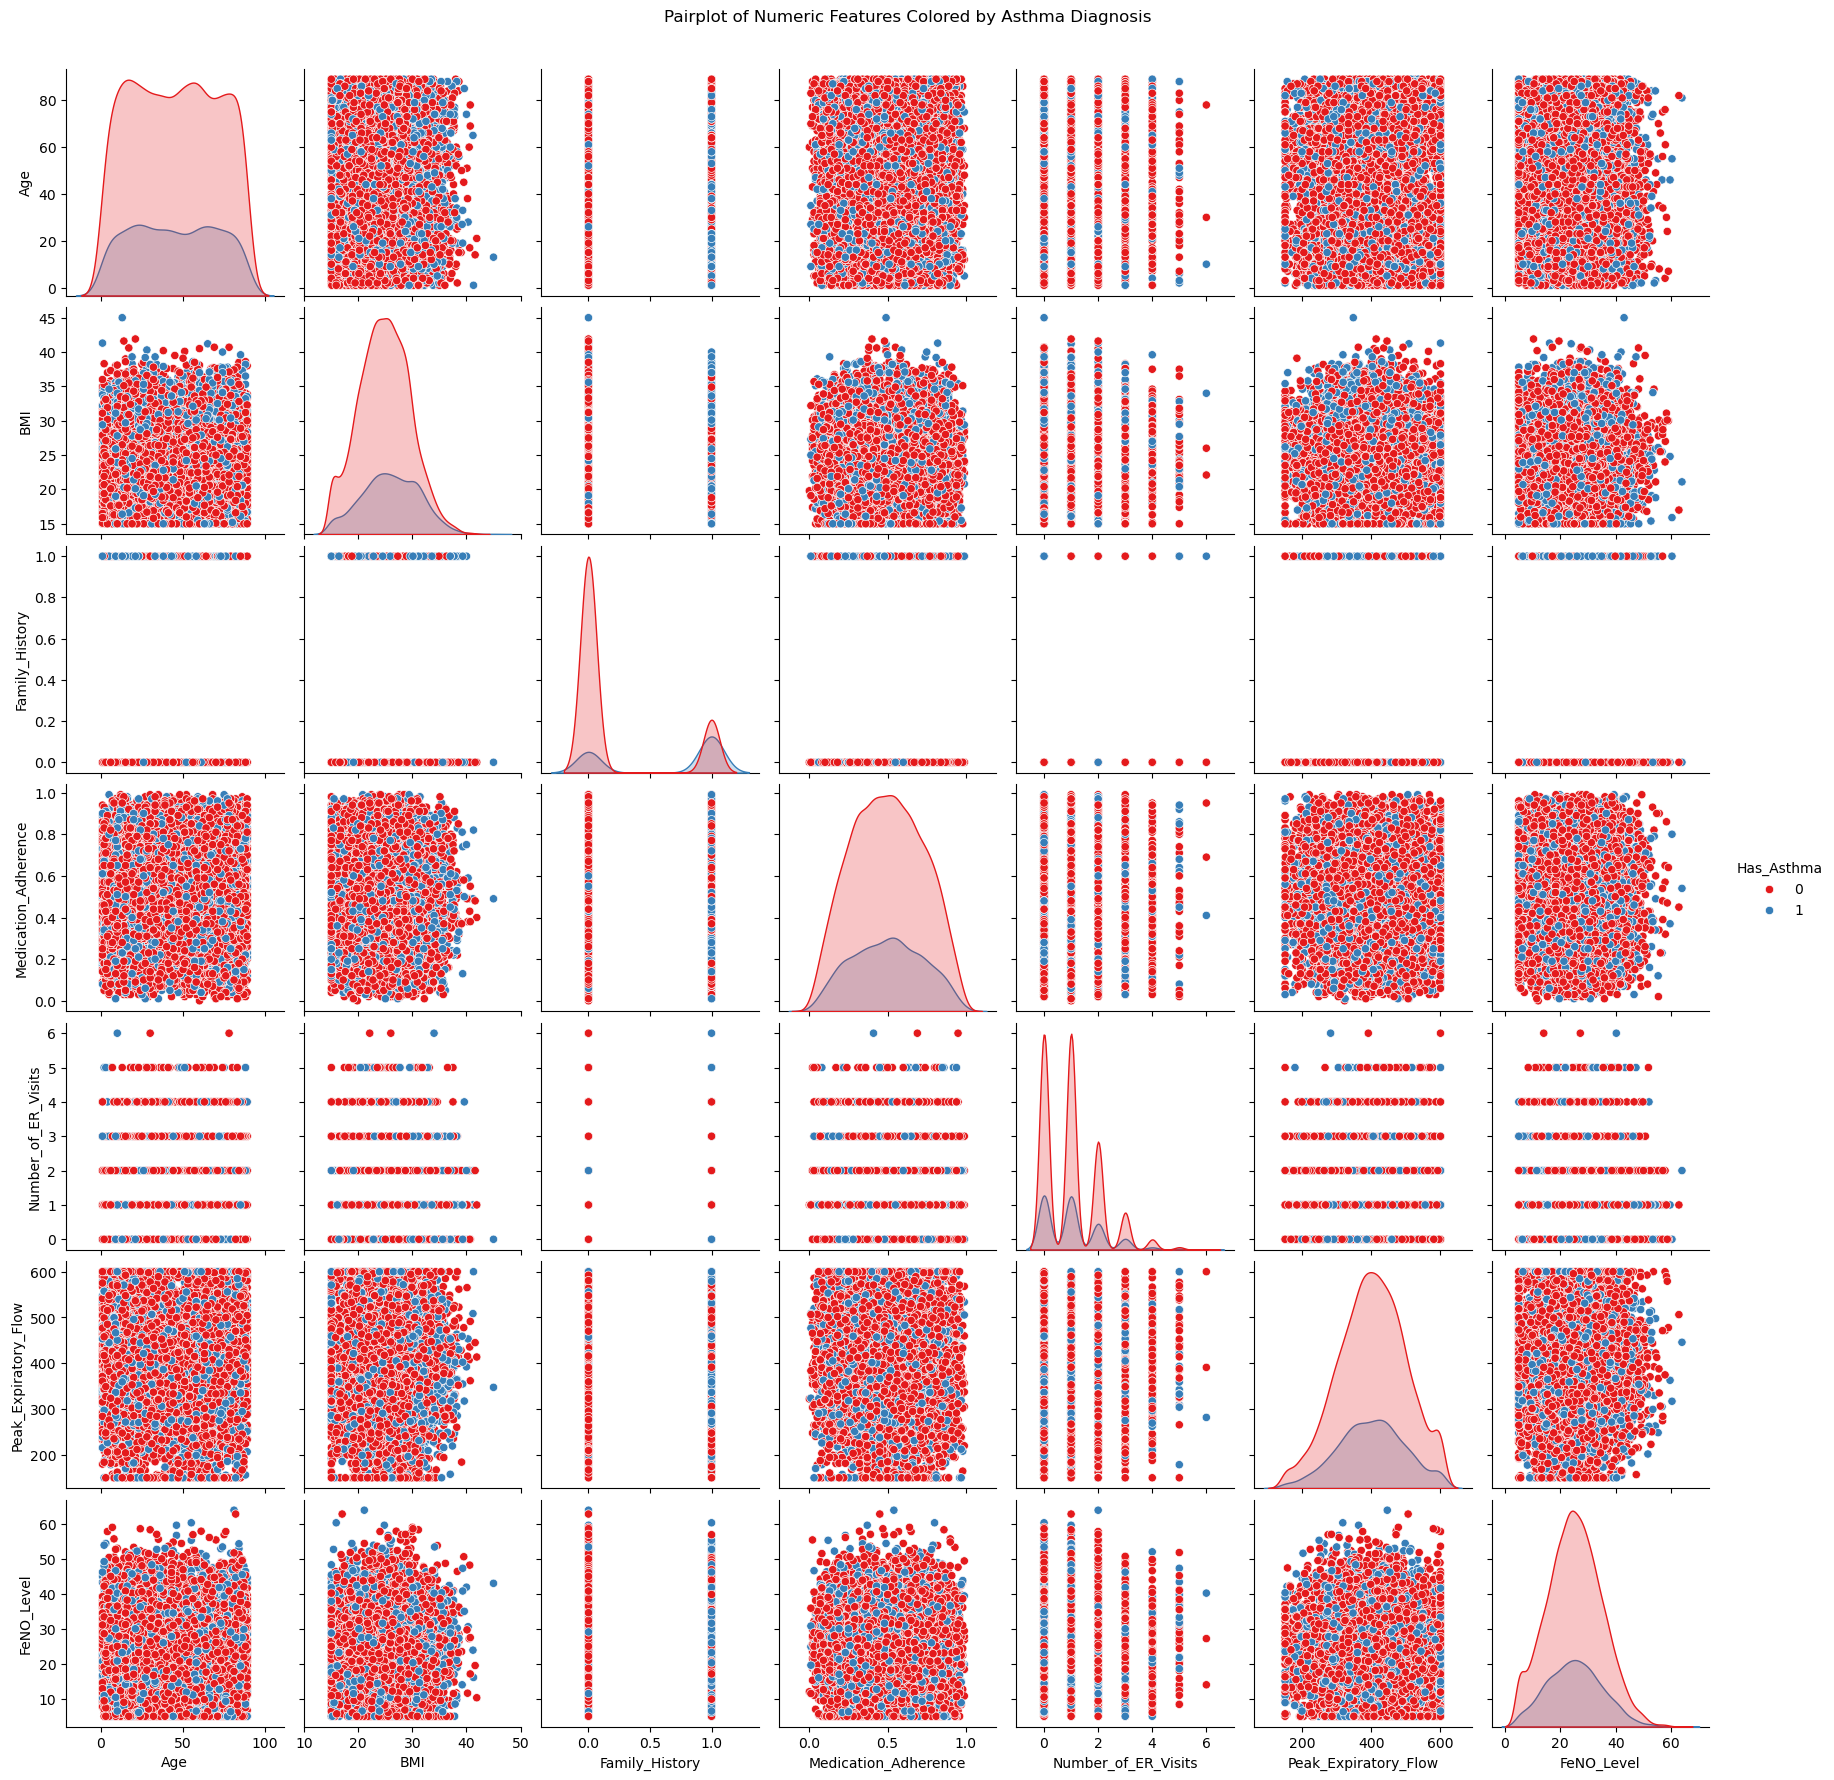

In [20]:
if "Has_Asthma" in df.columns:
    df["Has_Asthma"] = df["Has_Asthma"].astype(str)  # convert to string categories

# Select numeric columns only
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Create a smaller dataframe for plotting
plot_df = df[numeric_cols + ["Has_Asthma"]]

# Pairplot
pair = sns.pairplot(plot_df, hue="Has_Asthma", diag_kind="kde", palette="Set1")
pair.fig.suptitle("Pairplot of Numeric Features Colored by Asthma Diagnosis", y=1.02)

plt.show()

#Encoding

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["Air_Pollution_Level", "Physical_Activity_Level"]

ordinal_mapping = [
    ['Low', 'Moderate', 'High'],           # Air_Pollution_Level
    ['Sedentary', 'Moderate', 'Active']    # Physical_Activity_Level
]

ord_enc = OrdinalEncoder(categories=ordinal_mapping)
df[ordinal_cols] = ord_enc.fit_transform(df[ordinal_cols])



In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

nominal_cols = ["Gender", "Smoking_Status", "Allergies", "Occupation_Type", "Comorbidities"]


ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_nominal = ohe.fit_transform(df[nominal_cols])

# Convert to DataFrame
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=ohe.get_feature_names_out(nominal_cols))
encoded_nominal_df.index = df.index


In [23]:
numeric_cols = ["Age", "BMI", "Peak_Expiratory_Flow", "FeNO_Level", "Medication_Adherence", "Number_of_ER_Visits","Family_History"]

X = pd.concat([df[numeric_cols + ordinal_cols], encoded_nominal_df], axis=1)
y = df['Has_Asthma']


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_encoded = pd.get_dummies(X, drop_first=True)

#  2. Scale numeric features only
scaler = StandardScaler()

# Identify numeric columns after encoding (original numeric + ordinal)
numeric_cols_after = numeric_cols + ordinal_cols
X_scaled = X_encoded.copy()
X_scaled[numeric_cols_after] = scaler.fit_transform(X_scaled[numeric_cols_after])

# --- 3. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (8000, 26)
X_test shape: (2000, 26)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# --- 6. Train Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



In [27]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt


In [28]:
# --- 7. Evaluation ---
print("Classification Report:\n", classification_report(y_test, y_pred))
y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1513
           1       1.00      0.99      1.00       487

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC: 0.9999932141834424


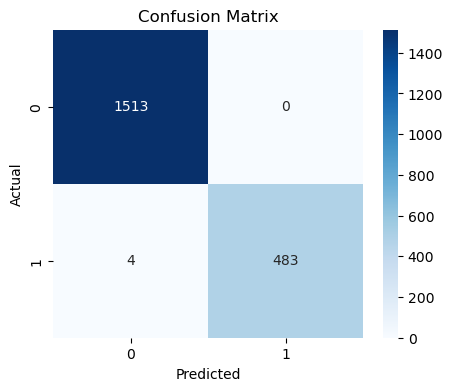

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


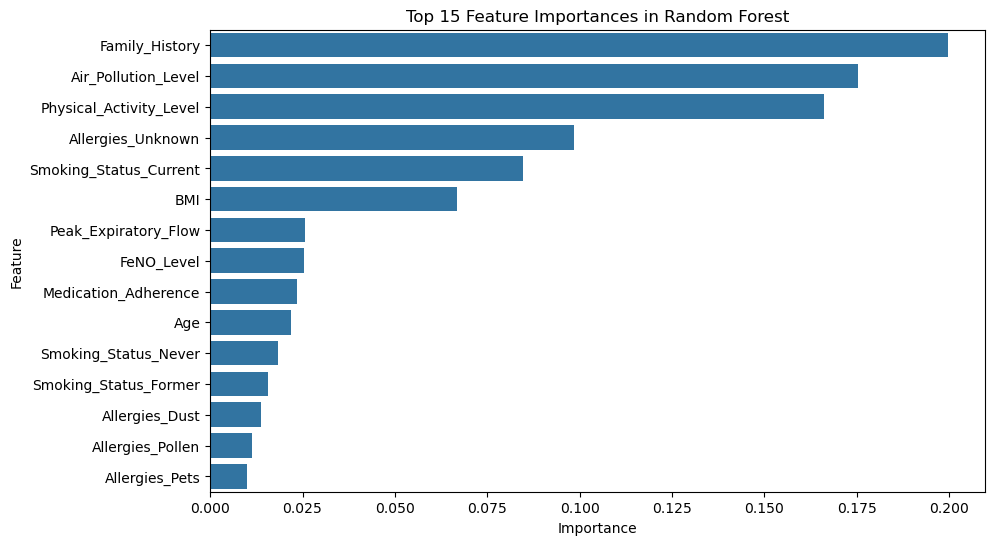

In [30]:
# --- 8. Feature Importances ---
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title("Top 15 Feature Importances in Random Forest")
plt.show()


In [31]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [32]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
lasso = Lasso(alpha=0.01)  # alpha can be tuned
lasso.fit(X_train, y_train)

# Get selected features
selected_features = X_encoded.columns[lasso.coef_ != 0]
print("Selected features by Lasso:")
print(selected_features)

# Reduce X to selected features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

Selected features by Lasso:
Index(['BMI', 'Family_History', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Smoking_Status_Current',
       'Allergies_Unknown', 'Comorbidities_Hypertension'],
      dtype='object')


In [35]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selected, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_selected)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925
Confusion Matrix:
 [[1419   85]
 [  65  431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1504
           1       0.84      0.87      0.85       496

    accuracy                           0.93      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.93      0.93      0.93      2000



In [36]:
# Convert target to integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_selected, y_train)

# Predict
y_pred = xgb.predict(X_test_selected)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995
Confusion Matrix:
 [[1503    1]
 [   0  496]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#cross validation

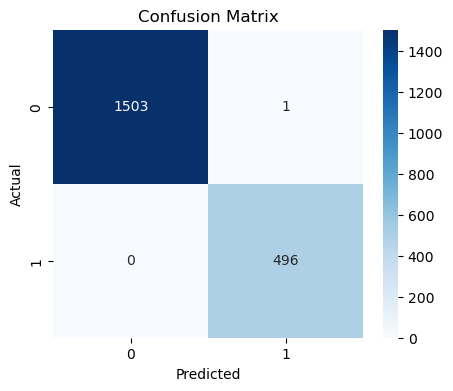

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [39]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier( eval_metric='logloss', random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42)
}


In [61]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y.astype(int), cv=cv, scoring='accuracy')
    print(f"{name} -> Mean Accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}")


Logistic Regression -> Mean Accuracy: 0.9301, Std: 0.0051
Random Forest -> Mean Accuracy: 0.9991, Std: 0.0010
XGBoost -> Mean Accuracy: 0.9994, Std: 0.0007
SVM (RBF) -> Mean Accuracy: 0.9810, Std: 0.0033
